# Linear Regressor Neural Network

In [13]:
# import some standar libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [3]:
# Read the dataframe with pandas
df = pd.read_csv('ann_1D_LR/mpg.csv')

In [5]:
# Checking the data
df.head()

,mpg (n),cylinders (n),displacement (n),horsepower (n),weight (n),acceleration (n),year (n),origin (n),name (s)
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,NaN
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,NaN
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,NaN
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,NaN
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg (n)             392 non-null float64
cylinders (n)       392 non-null float64
displacement (n)    392 non-null float64
horsepower (n)      392 non-null float64
weight (n)          392 non-null float64
acceleration (n)    392 non-null float64
year (n)            392 non-null float64
origin (n)          392 non-null float64
 name (s)           0 non-null float64
dtypes: float64(9)
memory usage: 27.6 KB


In [8]:
# The column ' name (s)' has only nan values, so we dropped
df.drop(' name (s)', axis = 1, inplace = True)

In [9]:
# Change the columns names to more friendly names
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

In [10]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

Now we make a pairplot for visualize the data

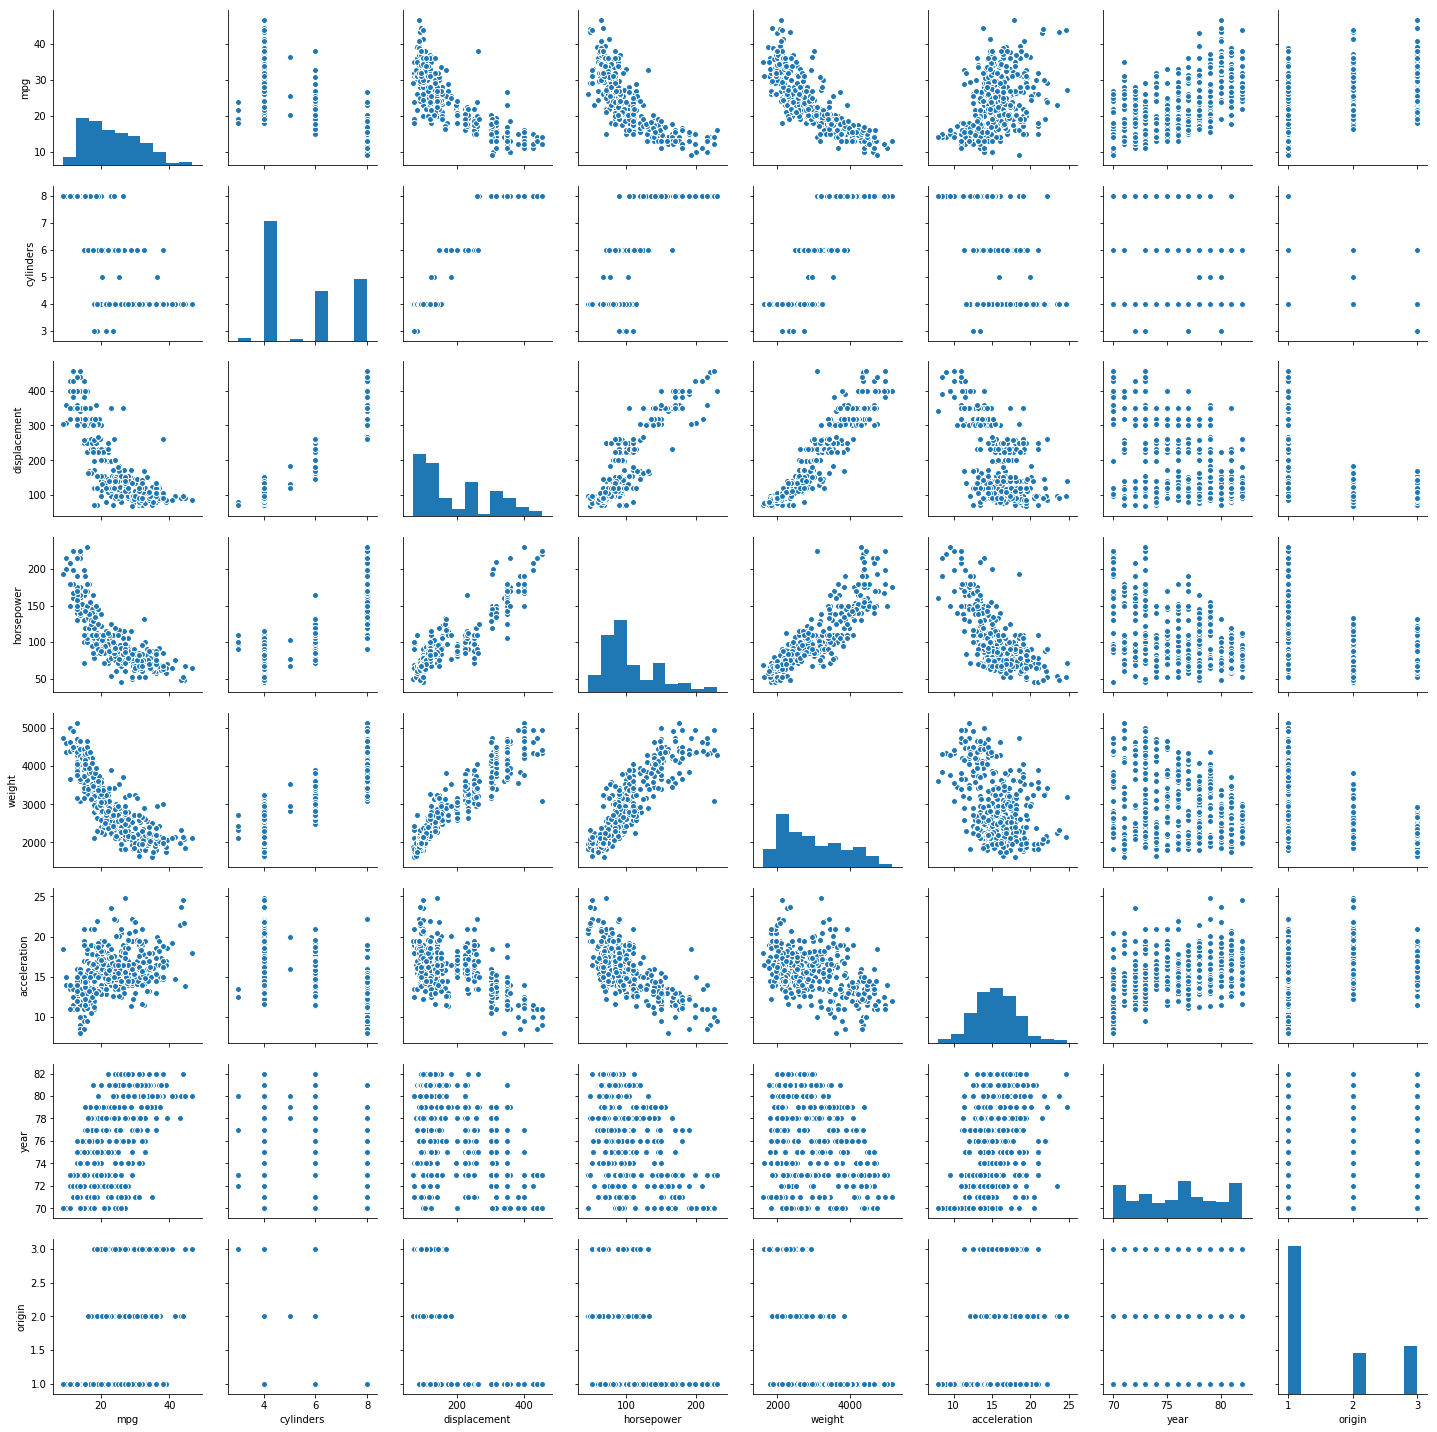

In [11]:
sns.pairplot(df)

### First we build our home-made neural-network with one hidden layer 

In [12]:
# Parameters to train the model
max_epoch     = 100000
learning_rate = 0.0001

# Training data
x_train = df.drop('mpg', axis = 1)[0:391].values.astype('float32')
y_train = df['mpg'][0:391].values.astype('float32')
y_train = y_train.reshape(len(y_train), 1)

# Testing data
x_test = df.drop('mpg', axis = 1)[-1:].values.astype('float32')
y_test = df['mpg'][-1:].values.astype('float32')

# Parameter of the layers of the neural-network
n_input = x_train.shape[1]
n_output = 1
n_hidden = 10


# tensorflow's tensors of the input/output data
xtf = tf.placeholder(dtype = tf.float32, shape = [None, n_input])
ytf = tf.placeholder(dtype = tf.float32, shape = [None, n_output])

# Definition of the perceptron with one hidden layer 
# and a linear function as activation function
def perceptron(xtf, weights, biases):
    '''
    xtf : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # Hidden layer
    layer = tf.add(tf.matmul(xtf, weights['l1']), biases['l1'])
    
    # Output layer
    output = tf.add(tf.matmul(layer, weights['out']), biases['out'])
    
    return output


# Definition of the dictionary with the weights
weights = {'l1': tf.Variable(tf.random_normal([n_input, n_hidden]), dtype = tf.float32),
           'out': tf.Variable(tf.random_normal([n_hidden, n_output]), dtype = tf.float32)}

# Definition of the dictionary with the biases
biases = {'l1': tf.Variable(tf.random_normal([n_hidden]), dtype = tf.float32),
          'out': tf.Variable(tf.random_normal([n_output]), dtype = tf.float32)}

# Construct model
linear_model = perceptron(xtf, weights, biases)

# Definition of the loss function, in this case the 
# loss function is the sum of the distances square
squared_deltas = tf.square(linear_model - y_train)
loss = tf.reduce_sum(squared_deltas)

# Optimizer used to find the weigths and biases
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train = optimizer.minimize(loss = loss)

# Launch the tensorflow session
sess = tf.Session()

# Initialize all the tensorflow variables
init = tf.global_variables_initializer()

sess.run(init)

# Run the training loop
for epoch in range(max_epoch):
    sess.run([train, loss], feed_dict = {xtf: x_train, ytf: y_train})
    
# Getting the optimized parameters
wopt, bopt, loss_f = sess.run([weights, biases, loss], feed_dict = {xtf: x_train, ytf: y_train})

# Printing the optimized parameter
print('Optimized weights:{}'.format(wopt))
print("\n")
print('Optimized biases:{}'.format(bopt))
print("\n")
print('Loss after optimization:{}'.format(loss_f))

Optimized weights:{'out': array([[ 1.3328042 ],
       [ 0.27872655],
       [-0.08511332],
       [ 0.5001145 ],
       [-0.57996273],
       [-0.7519353 ],
       [-0.71170503],
       [-0.1079834 ],
       [ 1.9186089 ],
       [ 0.91898555]], dtype=float32), 'l1': array([[ -2.08283499e-01,  -1.53917335e-02,   2.08742666e+00,
         -4.38044250e-01,   1.74949169e-01,   1.27847707e+00,
          1.60206929e-01,   1.40755689e+00,   8.69594216e-01,
         -2.74289697e-01],
       [  8.85615647e-01,  -2.03107357e+00,  -1.61126661e+00,
         -2.92961568e-01,   3.97090651e-02,  -1.46234524e+00,
          1.67727447e+00,   7.27682352e-01,  -3.51447165e-01,
          3.11460316e-01],
       [  5.20929578e-04,  -6.70247674e-01,  -2.00097442e-01,
         -1.27385724e+00,   4.79961783e-01,  -6.94028616e-01,
         -1.69662309e+00,   1.29331684e+00,  -1.03870738e+00,
          1.58780003e+00],
       [  3.67486715e-01,  -1.65483773e+00,  -1.14668596e+00,
         -6.55919433e-01,  -1.

In [14]:
# Now predict the value
y_pred = perceptron(xtf = x_test, weights = wopt, biases = bopt)

with tf.Session() as sess:
    y_pred = y_pred.eval()

In [15]:
print('Mean absolute error = {}'.format(mean_absolute_error(y_test, y_pred)))

Mean absolute error = 2.693033218383789


### Now we use tensorflow built-in LinearRegressor to train the model and make the predictions

In [16]:
# Import the corresponding model
from tensorflow.contrib.learn import LinearRegressor

In [17]:
# Definition of the feature columns for the model
feature_columns = [tf.feature_column.numeric_column("x", shape=[7])]

# Train data
train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x = {"x": np.array(df.drop('mpg', axis = 1)[0:391].values)},
      y = np.array(df['mpg'][0:391].values),
      num_epochs = 10000,
      shuffle=True)

# Initialize the model
LR = LinearRegressor(feature_columns = feature_columns)

# Fit the model with the training data
LR.fit(input_fn = train_input_fn, steps = 20000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2dc954d160>, '_environment': 'local', '_model_dir': '/tmp/tmp9dw58evt', '_master': '', '_evaluation_master': '', '_num_ps_replicas': 0, '_tf_random_seed': None, '_num_worker_replicas': 0, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_task_type': None, '_session_config': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_is_chief': True}
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp9dw58evt/model.ckpt.
INFO:tensorflow:loss = 570.375, step = 1
INFO:tensorflow:global_step/sec: 964.159
INFO:tensorflow:loss = 76.2059, step = 101 (0.105 s

INFO:tensorflow:global_step/sec: 1133.45
INFO:tensorflow:loss = 11.9981, step = 7301 (0.088 sec)
INFO:tensorflow:global_step/sec: 1143.83
INFO:tensorflow:loss = 13.0485, step = 7401 (0.088 sec)
INFO:tensorflow:global_step/sec: 1184.08
INFO:tensorflow:loss = 16.3287, step = 7501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1165.87
INFO:tensorflow:loss = 11.153, step = 7601 (0.085 sec)
INFO:tensorflow:global_step/sec: 1114.12
INFO:tensorflow:loss = 8.66043, step = 7701 (0.090 sec)
INFO:tensorflow:global_step/sec: 1175.44
INFO:tensorflow:loss = 11.3244, step = 7801 (0.085 sec)
INFO:tensorflow:global_step/sec: 1126.87
INFO:tensorflow:loss = 11.3142, step = 7901 (0.089 sec)
INFO:tensorflow:global_step/sec: 1147.31
INFO:tensorflow:loss = 14.7832, step = 8001 (0.087 sec)
INFO:tensorflow:global_step/sec: 1153.56
INFO:tensorflow:loss = 14.5412, step = 8101 (0.087 sec)
INFO:tensorflow:global_step/sec: 1176.81
INFO:tensorflow:loss = 9.89018, step = 8201 (0.085 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 10.9583, step = 15701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1079.15
INFO:tensorflow:loss = 9.92058, step = 15801 (0.092 sec)
INFO:tensorflow:global_step/sec: 1167.31
INFO:tensorflow:loss = 14.837, step = 15901 (0.086 sec)
INFO:tensorflow:global_step/sec: 1198.13
INFO:tensorflow:loss = 10.8534, step = 16001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1089.4
INFO:tensorflow:loss = 13.7754, step = 16101 (0.092 sec)
INFO:tensorflow:global_step/sec: 1155.08
INFO:tensorflow:loss = 11.8301, step = 16201 (0.088 sec)
INFO:tensorflow:global_step/sec: 1165.43
INFO:tensorflow:loss = 13.6646, step = 16301 (0.086 sec)
INFO:tensorflow:global_step/sec: 1155.42
INFO:tensorflow:loss = 10.2276, step = 16401 (0.086 sec)
INFO:tensorflow:global_step/sec: 1185.53
INFO:tensorflow:loss = 9.15009, step = 16501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1180.22
INFO:tensorflow:loss = 13.8341, step = 16601 (0.085 sec)
INFO:tensorflow:global_step/sec: 1069.04
INFO:tensorflow:loss =

LinearRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x7f2dc9540fd0>, 'gradient_clip_norm': None, 'optimizer': None, 'feature_columns': [_NumericColumn(key='x', shape=(7,), default_value=None, dtype=tf.float32, normalizer_fn=None)], 'joint_weights': False})

In [19]:
# Testing data
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": x_test},
      num_epochs=1,
      shuffle=False)

y_pred = LR.predict(input_fn = predict_input_fn)

y_pred = list(y_pred)

Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
INFO:tensorflow:Restoring parameters from /tmp/tmp9dw58evt/model.ckpt-20000


In [20]:
print('Mean absolute error = {}'.format(mean_absolute_error(y_test, y_pred)))

Mean absolute error = 3.0978164672851562
